In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
# colorset for scores
score_color = {
    "Missing": "#474747",
    "Good": "#8AC69B",
    "Doubtful": "#9C8800",
    "Unsuitable": "#BF3A43",
}

anomaly_type_letter_explanation = {
    "A": "Außerhalb Vertrauensbereich (Experten Spanne)",
    "B": "physikalisch unmögliche Werte (phys. Spanne)",
    "C": "Out-of-sensor-range values (techn. Spanne)",
    "D": "Ausfall",
    "E": "Konstanz / geringe Variabilität",
    "F": "Ausreißer",
    "G": "Gradient",
    "H": "Rauschen",
    "I": "Drift",
    "J": "Shift",
    "K": "Keine Aufzeichnung"
}

# http://hclwizard.org:3000/hclwizard/
# can be updated if there are better ideas
anomaly_type_color = {
    "A": "#DB9D85",
    "B": "#E093C3",
    "C": "#ACA4E2",
    "D": "#4CB9CC",
    "E": "#5CBD92",
    "F": "#ABB065",
    "G": "#DB9D85",
    "H": "#89D9CF",
    "I": "#AC7F21",
    "J": "#533600",
    "K": "#4CB9CC"
}

In [73]:
# Define the full path to your Excel file
file_path = r'R:\M_883_Entfrachten\Durchführung\Daten\10_Datenauswertung\Anomalieerkennung\Event 589\Q_MW_Kanal_Regenevent589.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)
df.head()

,Date&Time,app1_conc [mg/l],app1_conc_lt63 [mg/l],app1_h [m],app1_t_water [Â°C],Anomalietyp
0,2023-10-19 14:30:00,0.0,0.0,0.091,18.1,K
1,2023-10-19 14:30:30,0.0,0.0,0.091,18.1,K
2,2023-10-19 14:31:00,0.0,0.0,0.092,18.1,K
3,2023-10-19 14:31:30,0.0,0.0,0.092,18.1,K
4,2023-10-19 14:32:00,0.0,0.0,0.092,18.1,K


In [74]:
# Convert the 'Date&Time' column to datetime format
df['Date&Time'] = pd.to_datetime(df['Date&Time'])
# Check the data types of all columns
print(df.dtypes)

Date&Time                datetime64[ns]
app1_conc [mg/l]                float64
app1_conc_lt63 [mg/l]           float64
app1_h [m]                      float64
app1_t_water [Â°C]              float64
Anomalietyp                      object
dtype: object


In [75]:
# set the key parameter of the dataset
df['key parameter'] = df['app1_conc [mg/l]']

In [76]:
# Splitting the 'Anomalietyp' column into two columns
df[['Anomalietyp_1', 'Anomalietyp_2']] = df['Anomalietyp'].str.split(',', expand=True)
# Display the DataFrame with the new columns
print(df)

              Date&Time  app1_conc [mg/l]  app1_conc_lt63 [mg/l]  app1_h [m]  \
0   2023-10-19 14:30:00               0.0                    0.0       0.091   
1   2023-10-19 14:30:30               0.0                    0.0       0.091   
2   2023-10-19 14:31:00               0.0                    0.0       0.092   
3   2023-10-19 14:31:30               0.0                    0.0       0.092   
4   2023-10-19 14:32:00               0.0                    0.0       0.092   
..                  ...               ...                    ...         ...   
731 2023-10-19 20:35:00               0.0                    0.0       0.093   
732 2023-10-19 20:35:30               0.0                    0.0       0.093   
733 2023-10-19 20:36:00               0.0                    0.0       0.093   
734 2023-10-19 20:36:30               0.0                    0.0       0.093   
735 2023-10-19 20:37:00               0.0                    0.0       0.093   

     app1_t_water [Â°C] Anomalietyp  ke

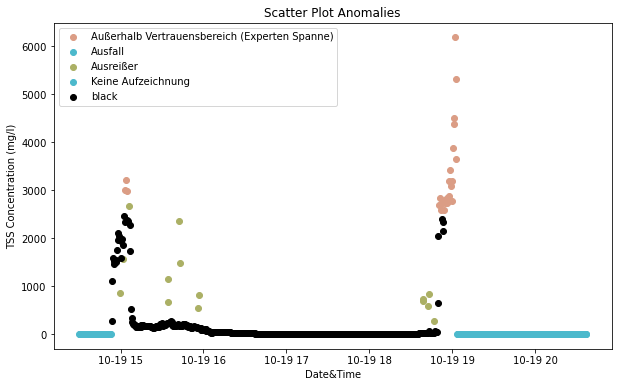

In [79]:
# Fill in black for missing values
default_color = "black"

# Plot data
plt.figure(figsize=(10, 6))
# Fill missing values with default color
df['Anomalietyp_1'].fillna(value=default_color, inplace=True)
# Plot with updated colors and legend labels
# Only plots the data for the first Anomalytype
for anomaly_type, group in df.groupby('Anomalietyp_1'):
    color = anomaly_type_color.get(anomaly_type, default_color)
    explanation = anomaly_type_letter_explanation.get(anomaly_type, anomaly_type)
    plt.scatter(group['Date&Time'], group['key parameter'], label=explanation, color=color)

# Customize plot
plt.xlabel('Date&Time')
plt.ylabel('TSS Concentration (mg/l)')
plt.title('Scatter Plot Anomalies')
plt.legend()
plt.grid(False)

# Show plot
plt.show()